In [82]:
import networkx as nx
import matplotlib.pyplot as plt

### T_pqr

In [83]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    p = int(p)
    q = int(q)
    r = int(r)
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

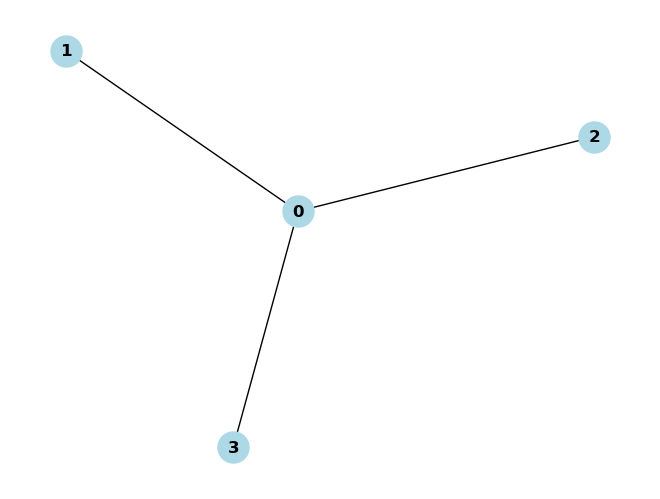

In [85]:
D5 = T_pqr(2,2,2)
labels = {n: D5.nodes[n] for n in D5.nodes}
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

### WAGI WIERZCHOŁKÓW z listy

In [86]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, weight in enumerate(wagi_lista):
        G.add_node(idx, weight=weight) 
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi 

### Odbicie do listy

In [89]:
def odbicie(G, node):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

### Eliminacja minusów

In [13]:
def pozytywne(G):
    for node, data in G.nodes(data=True):
        if data['weight'] is not None and data['weight'] < 0:
            return False
    return True

In [76]:
def ro_1(G):    
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        weights.append( G.nodes[node]['weight'])
    return weights

In [70]:
# nieefektywnie jedzie po ujemnych wierzchołkach
def zmiana_na_dodatnie(G, count = 0):
    nodes_z_odbiciem = []
    wagi = []
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='weight') if data is not None and data < 0]
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1

        if count > 10:
            print("Maximum number of iterations reached. Exiting loop.")
            break
        if not nodes_ujemne:
            break
    for _, w in G.nodes(data='weight'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania w procedurze eliminacja minusów:  {nodes_z_odbiciem}, wagi na końcu: {wagi}, count:  {count}")

In [80]:
def ro_2(G):
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        weights.append( G.nodes[node]['weight'])
    return weights

### Do komandera

In [91]:
def main(p, q, r, G, wagi_lista):
    p = int(p)
    q = int(q)
    r = int(r)
    G = T_pqr(p, q, r)
    wagi_lista = [int(waga) for waga in wagi_lista]  # Zamienia stringi na liczby
    nadawanie_wag(G, wagi_lista)
    pozytywne(G)
    ro_1(G)
    zmiana_na_dodatnie(G, count=0)
    ro_2(G)

if __name__ == "__main__":
    p = int(input("Podaj wartość dla p: "))
    q = int(input("Podaj wartość dla q: "))
    r = int(input("Podaj wartość dla r: "))
    wagi_lista = input("Podaj wartości wag jako listę: ").split(",")
    G = T_pqr(p, q, r)
    main(p, q, r, G, wagi_lista)

Podaj wartość dla p:  2
Podaj wartość dla q:  2
Podaj wartość dla r:  2
Podaj wartości wag jako listę:  1,1,1,1


Wierzchołki w kolejności wywoływania w procedurze eliminacja minusów:  [], wagi na końcu: [0, 0, 0, 0], count:  0
